In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime

# import a file that contains a summary statistics function
import edhec_risk_kit_206 as erk

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Apple data
aapl = web.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2009, 1, 1), 
                          end=datetime.datetime(2018, 12, 31))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,12.534286,12.191428,12.281428,12.192857,151885300.0,10.583897
2009-01-02,13.005714,12.165714,12.268572,12.964286,186503800.0,11.253528
2009-01-05,13.740000,13.244286,13.310000,13.511429,295402100.0,11.728474
2009-01-06,13.881429,13.198571,13.707143,13.288571,322327600.0,11.535025
2009-01-07,13.214286,12.894286,13.115714,13.001429,188262200.0,11.285772


In [3]:
# 100 day moving average for the adjusted close, adding it to the DataFrame
aapl_100MA = aapl["Adj Close"].rolling(window=100).mean()
aapl["100MA"] = aapl_100MA
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,100MA
Date,,,,,,,
2008-12-31,12.534286,12.191428,12.281428,12.192857,151885300.0,10.583897,NaN
2009-01-02,13.005714,12.165714,12.268572,12.964286,186503800.0,11.253528,NaN
2009-01-05,13.740000,13.244286,13.310000,13.511429,295402100.0,11.728474,NaN
2009-01-06,13.881429,13.198571,13.707143,13.288571,322327600.0,11.535025,NaN
2009-01-07,13.214286,12.894286,13.115714,13.001429,188262200.0,11.285772,NaN


In [4]:
apple = aapl[["Adj Close", "100MA"]]
apple.dropna(inplace=True)
apple.head()

,Adj Close,100MA
Date,,
2009-05-26,16.217484,12.986957
2009-05-27,16.498974,13.046108
2009-05-28,16.749466,13.101067
2009-05-29,16.841228,13.152195
2009-06-01,17.280214,13.209647


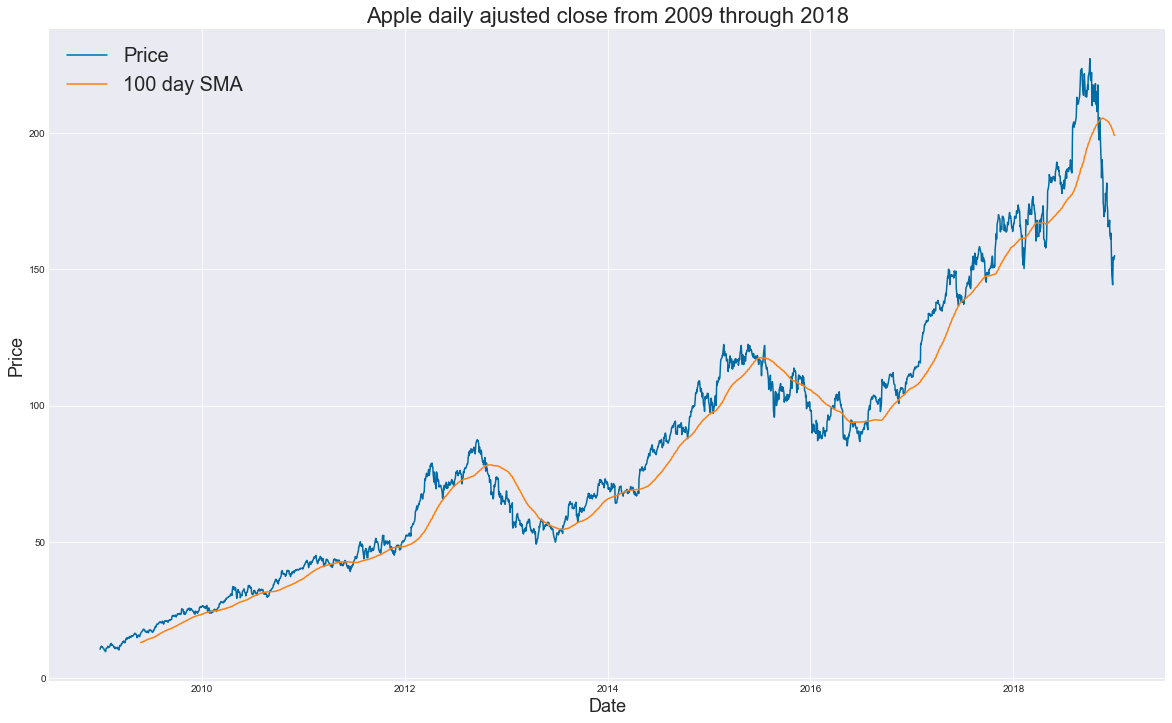

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Set color style
plt.style.use('seaborn-dark')
plt.style.use("tableau-colorblind10")


fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(aapl["Adj Close"])
ax1 = plt.plot(aapl["100MA"])
ax1 = plt.title("Apple daily ajusted close from 2009 through 2018", fontsize=22)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Price", fontsize=18)
ax1 = plt.legend(["Price", "100 day SMA"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

 Create a list of our position in Apple for each day. If the price is higher than the MA we go long, if the price is lower, go short.

In [6]:
Position = []
for i in range(0,apple.shape[0]):
    if apple["Adj Close"].iloc[i] > apple["100MA"].iloc[i]:
        Position.append("Long")
    else:
        Position.append("Short")

apple["Position"] = Position
apple.head()

,Adj Close,100MA,Position
Date,,,
2009-05-26,16.217484,12.986957,Long
2009-05-27,16.498974,13.046108,Long
2009-05-28,16.749466,13.101067,Long
2009-05-29,16.841228,13.152195,Long
2009-06-01,17.280214,13.209647,Long


Compute the daily change in price for Apple

In [7]:
apple["Difference"] = apple["Adj Close"]- apple["Adj Close"].shift()
apple.dropna(inplace=True)
apple.head()

,Adj Close,100MA,Position,Difference
Date,,,,
2009-05-27,16.498974,13.046108,Long,0.281490
2009-05-28,16.749466,13.101067,Long,0.250492
2009-05-29,16.841228,13.152195,Long,0.091763
2009-06-01,17.280214,13.209647,Long,0.438986
2009-06-02,17.297573,13.269765,Long,0.017359


Add up the daily changes depending on our position. If we are long, add the change in price, if we are short, subtract the price. The starting value of our strategy or position will be the starting value of Apple.

In [8]:
# If long, then add the difference, if short subtract the difference
LongShort = [0]*apple.shape[0]
LongShort[0] = apple["Adj Close"].iloc[0]
    
for i in range(1, apple.shape[0]):
    if apple["Position"].iloc[i] == "Long":
        LongShort[i] = LongShort[i-1] + apple["Difference"].iloc[i]
    else:
        LongShort[i] = LongShort[i-1] - apple["Difference"].iloc[i]
        
apple["LongShort"] = LongShort
apple.head()

,Adj Close,100MA,Position,Difference,LongShort
Date,,,,,
2009-05-27,16.498974,13.046108,Long,0.281490,16.498974
2009-05-28,16.749466,13.101067,Long,0.250492,16.749466
2009-05-29,16.841228,13.152195,Long,0.091763,16.841228
2009-06-01,17.280214,13.209647,Long,0.438986,17.280214
2009-06-02,17.297573,13.269765,Long,0.017359,17.297573


Plot the strategy together with the price of apple stock over the period

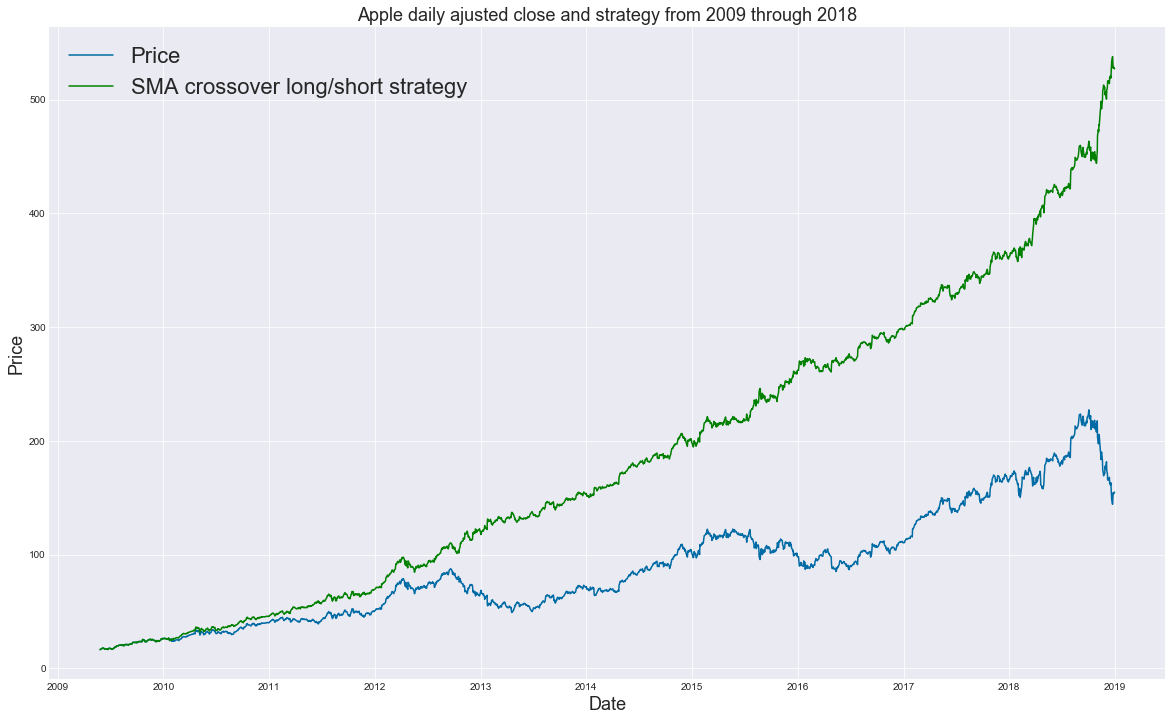

In [9]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(apple["Adj Close"])
ax1 = plt.plot(apple["LongShort"], color="green")
ax1 = plt.title("Apple daily ajusted close and strategy from 2009 through 2018", fontsize=18)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Price", fontsize=18)
ax1 = plt.legend(["Price", "SMA crossover long/short strategy"],prop={"size":22}, loc="upper left")
plt.grid(True)
plt.show()

We will do the following for the EMA, and I will create a general function where we can choose which strategy to include

In [10]:
def strategies(df, days, MA=False, EMA=False, MACD=False):
    """
    Add selected moving averages to the DataFrame
    """
    if MA==True:
    # simple moving average
        df["MA"] = df["Adj Close"].rolling(window=days).mean()
    
    if EMA==True:
    # exponential moving average
        df["EMA"] = df["Adj Close"].ewm(span=days).mean()

    if MACD==True:
        # exponential moving average
            df["EMA_26"] = df["Adj Close"].ewm(span=26).mean()
            df["EMA_126"] = df["Adj Close"].ewm(span=126).mean()
    return df

    

def positions(df, MA=False, EMA=False, MACD=False):
    """
    calculates the positions we should hold each day according to each strategy
    """
    df_positions = pd.DataFrame(index=df.index)
    if MA==True:
    # Add position type for each day for the MA
        MA_Position = []
        for i in range(0,df.shape[0]):
            if df["Adj Close"].iloc[i] > df["MA"].iloc[i]:
                MA_Position.append("Long")
            else:
                MA_Position.append("Short")
        df_positions["MA_Position"] = MA_Position
    
    if EMA==True:
    # Add position type for each day for the EMA
        EMA_Position = []
        for i in range(0,df.shape[0]):
            if df["Adj Close"].iloc[i] > df["EMA"].iloc[i]:
                EMA_Position.append("Long")
            else:
                EMA_Position.append("Short")
        df_positions["EMA_Position"] = EMA_Position
        
    if MACD==True:
    # Add position type for each day for the EMA
        MACD_Position = []
        for i in range(0,df.shape[0]):
            if df["EMA_26"].iloc[i] > df["EMA_126"].iloc[i]:
                MACD_Position.append("Long")
            else:
                MACD_Position.append("Short")
        df_positions["MACD_Position"] = MACD_Position
    
    return df_positions


def price_of_strategy(df, df_positions, LongHold=False, LongShort=False, MA=False, EMA=False, MACD=False):
    """
    given a DataFrame containing one or more position vectors, 
    Create price process of the strategies, adding the daily change if we are long
    subtracting if we are short.
    """
    df_price_of_strategy = pd.DataFrame(index=df_positions.index)
    df_price_of_strategy["asset price"] = df["Adj Close"]
    # long hold will long the strategy if condition is met, but instead of shorting it will
    # simply sell and wait for another entry point. A better version of this would be to
    # buy bonds instead of holding cash.
    if LongHold == True:
        if MA == True:
            LongHold = [0]*df.shape[0]
            LongHold[0] = df["Adj Close"].iloc[0]
            for i in range(1, df_positions.shape[0]):
                if df_positions["MA_Position"].iloc[i] == "Long":
                    LongHold[i] = LongHold[i-1] + df["Difference"].iloc[i]
                else:
                    LongHold[i] = LongHold[i-1]
            df_price_of_strategy["LongHold MA"] = LongHold
            
        if EMA == True:
            LongHold = [0]*df.shape[0]
            LongHold[0] = df["Adj Close"].iloc[0]
            for i in range(1, df_positions.shape[0]):
                if df_positions["EMA_Position"].iloc[i] == "Long":
                    LongHold[i] = LongHold[i-1] + df["Difference"].iloc[i]
                else:
                    LongHold[i] = LongHold[i-1]
            df_price_of_strategy["LongHold EMA"] = LongHold
            
        if MACD == True:
            LongHold = [0]*df.shape[0]
            LongHold[0] = df["Adj Close"].iloc[0]
            for i in range(1, df_positions.shape[0]):
                if df_positions["MACD_Position"].iloc[i] == "Long":
                    LongHold[i] = LongHold[i-1] + df["Difference"].iloc[i]
                else:
                    LongHold[i] = LongHold[i-1]
            df_price_of_strategy["LongHold MACD"] = LongHold
    
    
    if LongShort == True:
        if MA == True:
            LongShort = [0]*df.shape[0]
            LongShort[0] = df["Adj Close"].iloc[0]
            for i in range(1, df.shape[0]):
                if df_positions["MA_Position"].iloc[i] == "Long":
                    LongShort[i] = LongShort[i-1] + df["Difference"].iloc[i]
                else:
                    LongShort[i] = LongShort[i-1] - df["Difference"].iloc[i]
            df_price_of_strategy["LongShort MA"] = LongShort
                
        if EMA == True:
            LongShort = [0]*df.shape[0]
            LongShort[0] = df["Adj Close"].iloc[0]
            for i in range(1, df.shape[0]):
                if df_positions["EMA_Position"].iloc[i] == "Long":
                    LongShort[i] = LongShort[i-1] + df["Difference"].iloc[i]
                else:
                    LongShort[i] = LongShort[i-1] - df["Difference"].iloc[i]
            df_price_of_strategy["LongShort EMA"] = LongShort
            
        if MACD == True:
            LongShort = [0]*df.shape[0]
            LongShort[0] = df["Adj Close"].iloc[0]
            for i in range(1, df.shape[0]):
                if df_positions["MACD_Position"].iloc[i] == "Long":
                    LongShort[i] = LongShort[i-1] + df["Difference"].iloc[i]
                else:
                    LongShort[i] = LongShort[i-1] - df["Difference"].iloc[i]
            df_price_of_strategy["LongShort MACD"] = LongShort
    return df_price_of_strategy


def strategy_returns(df, df_price_of_strategy):
    """
    input the price series of a strategy and output the return series
    """
    #return_asset = (df["Adj Close"] - df["Adj Close"].shift())/df["Adj Close"]
    
    df_return_of_strategy = pd.DataFrame(index=df_price_of_strategy.index)
    #df_return_of_strategy["asset return"] = return_asset
    
    cols = df_price_of_strategy.columns
    
    for priceSeries in cols:
        df_return_of_strategy[priceSeries] = (df_price_of_strategy[priceSeries]
                    - df_price_of_strategy[priceSeries].shift())/(df_price_of_strategy[priceSeries])
    
    return df_return_of_strategy

In [11]:
def strategy(ticker, start, end, days, MA=False, EMA=False, MACD=False, LongHold=False, LongShort=False):
    """
    calculates the return on a moving average strategy of your choice
    """
    # load the data
    df = web.get_data_yahoo(f'{ticker}', 
                              start=start, 
                              end=end)
    # Daily change in the asset value
    df["Difference"] = df["Adj Close"]- df["Adj Close"].shift()
    
    # only keep the adjusted close and daily change
    df = df[["Adj Close", "Difference"]]
    
    # choose which moving averages we want
    df = strategies(df=df, days=100, MA=MA, EMA=EMA, MACD=MACD)
    # drop na's from the MA calculations
    df.dropna(inplace=True)

    # DataFrame of the positions we wish to hold
    df_positions = positions(df, MA=MA, EMA=EMA, MACD=MACD)


    df_price_of_strategy = price_of_strategy(df, df_positions, LongHold=LongHold,
                                             LongShort=LongHold, MA=MA, EMA=EMA, MACD=MACD)

    # view summary statistics of the return series of the three strategies
    df_return_of_strategy = strategy_returns(df, df_price_of_strategy)
    df_return_of_strategy.dropna(inplace=True)
    table = erk.summary_stats(df_return_of_strategy, ppp=252)
    return df, table, df_return_of_strategy, df_positions, df_price_of_strategy

def plot_strategy(ticker, start, end, df):
    """
    Plot the performance of the strategy vs the performance of the asset
    """
    
    
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.plot(df)
    ax1 = plt.title("Comparing simple investment strategies for " +
                        ticker + " between " + start + " and " + end, fontsize=22)
    ax1 = plt.xlabel("Date", fontsize=18)
    ax1 = plt.ylabel("Price", fontsize=18)
    ax1 = plt.legend(list(df_return_of_strategy.columns),prop={"size":22}, loc="upper left")
    plt.grid(True)
    plt.show()
    
    #ax = df.plot(figsize=(20,10))
    #plt.show()

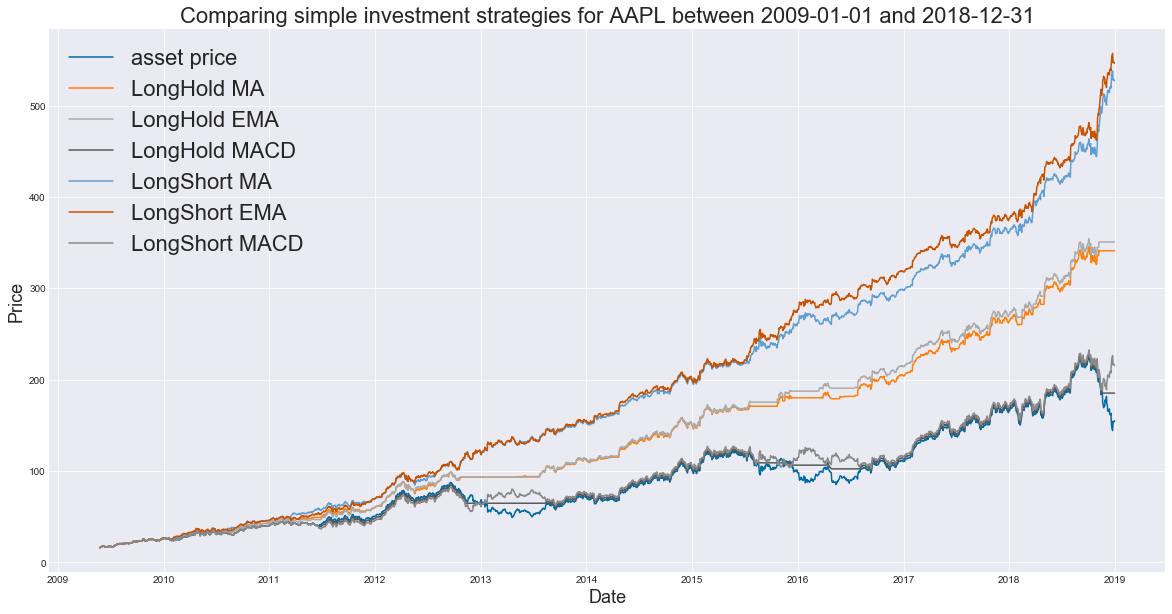

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,0.184254,0.257027,-0.391279,7.768740,0.026020,0.037482,0.582723,-0.480584
LongHold MA,0.338031,0.161289,0.358762,8.847752,0.013242,0.022947,1.854416,-0.160791
LongHold EMA,0.341013,0.163343,0.269051,8.674954,0.013725,0.023412,1.848829,-0.137817
LongHold MACD,0.229588,0.216972,-0.030808,7.223845,0.020518,0.032322,0.893186,-0.311966
LongShort MA,0.400185,0.160868,0.346291,7.815025,0.013273,0.021771,2.234441,-0.144274
LongShort EMA,0.405691,0.160249,0.247268,7.926809,0.013473,0.022130,2.276429,-0.123324
LongShort MACD,0.231196,0.248036,0.066614,6.647187,0.023301,0.035626,0.787614,-0.340505


In [12]:
start = datetime.date(2009, 1, 1)
end = datetime.date(2018, 12, 31)
ticker = "AAPL"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(ticker=ticker, start=str(start), end=str(end), df=df_price_of_strategy)
table

The strategy undoubtably performs very well in this period for apple, more than a double annualized returns, and a max drawdown cut in three, but how does this perform on other assets at other timeframes?

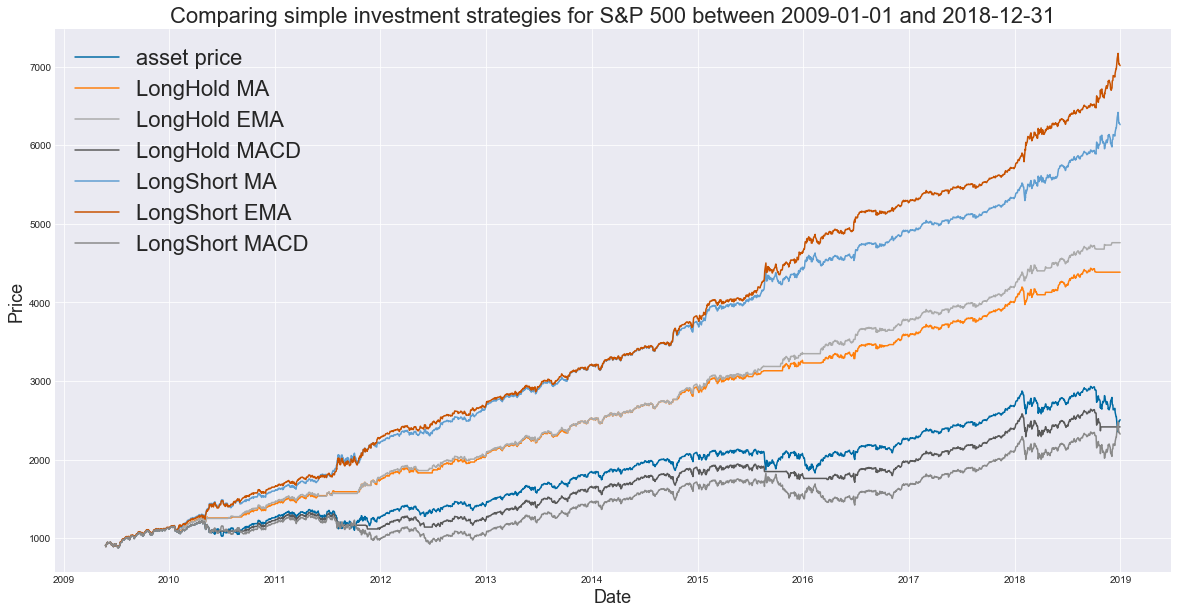

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,0.085853,0.152365,-0.555093,7.371488,0.016023,0.024281,0.355932,-0.220110
LongHold MA,0.169484,0.085137,-0.201620,9.714887,0.007760,0.012980,1.590829,-0.074458
LongHold EMA,0.179516,0.085228,-0.112180,9.305540,0.007646,0.012772,1.703416,-0.072428
LongHold MACD,0.088467,0.130134,-0.648204,6.976111,0.013899,0.021076,0.436244,-0.170756
LongShort MA,0.211197,0.096534,0.046615,8.300212,0.008490,0.014142,1.822593,-0.074458
LongShort EMA,0.225902,0.095085,0.097826,8.753907,0.008161,0.013800,2.000517,-0.072428
LongShort MACD,0.068783,0.176532,-0.324093,5.959036,0.018300,0.027135,0.213308,-0.332466


In [13]:
start = datetime.date(2009, 1, 1)
end = datetime.date(2018, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table

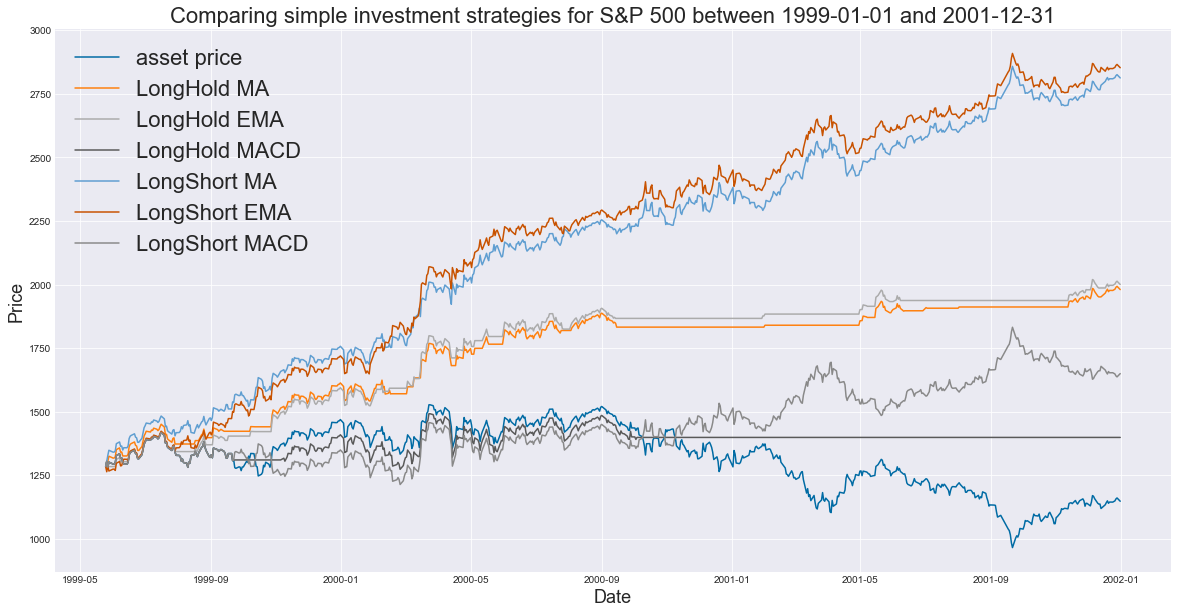

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,-0.083112,0.208574,-0.069895,4.494240,0.021717,0.028613,-0.526584,-0.411245
LongHold MA,0.170120,0.099580,0.676521,10.393286,0.007473,0.013592,1.366287,-0.054714
LongHold EMA,0.174783,0.099124,0.711855,10.564387,0.007330,0.013379,1.418246,-0.055887
LongHold MACD,0.014108,0.137880,-0.319045,11.309470,0.013497,0.021661,-0.111922,-0.119566
LongShort MA,0.328981,0.133368,0.129021,4.786029,0.012031,0.017490,2.176765,-0.059392
LongShort EMA,0.336459,0.132782,0.135142,4.764044,0.011940,0.017412,2.241052,-0.057404
LongShort MACD,0.061862,0.191501,-0.283278,5.042605,0.019972,0.027460,0.161542,-0.164771


In [14]:
# let's look at the tech bubble
start = datetime.date(1999, 1, 1)
end = datetime.date(2001, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table

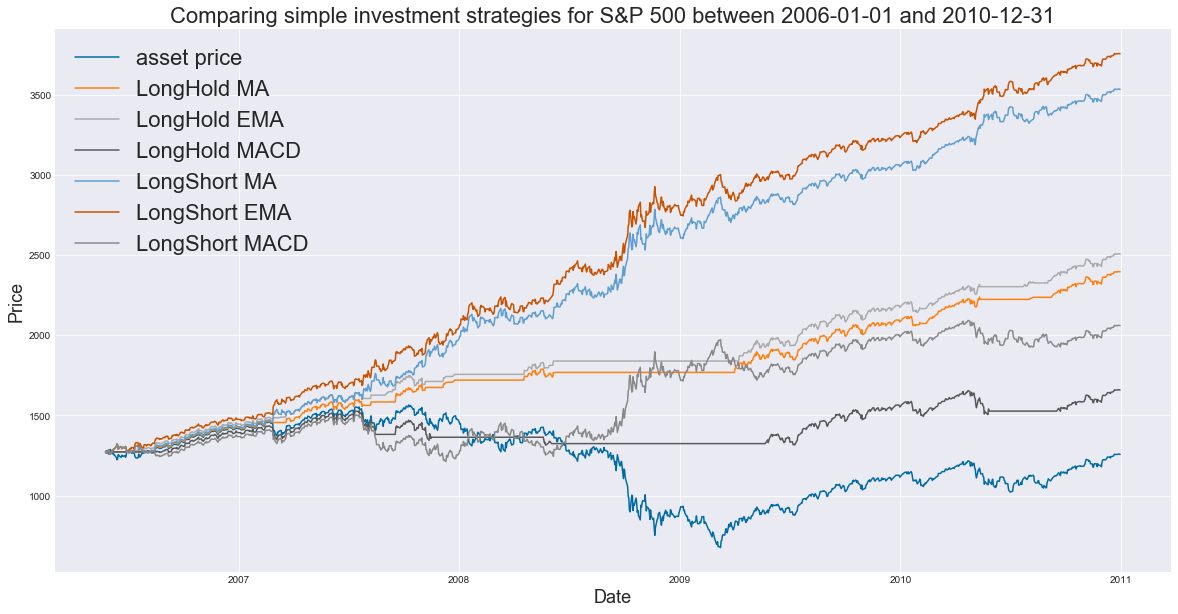

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,-0.067587,0.259451,-0.462692,10.890162,0.026497,0.042512,-0.365227,-0.649489
LongHold MA,0.141685,0.069807,0.003839,8.558162,0.006197,0.010849,1.553505,-0.035916
LongHold EMA,0.153251,0.067885,-0.044655,8.743528,0.006015,0.010343,1.762905,-0.037541
LongHold MACD,0.049753,0.095080,-0.770922,10.578766,0.009966,0.016898,0.201719,-0.151716
LongShort MA,0.230362,0.120243,0.087797,6.809376,0.010830,0.016972,1.617970,-0.068368
LongShort EMA,0.248353,0.114613,0.026423,6.798044,0.010356,0.016364,1.849878,-0.064925
LongShort MACD,0.077173,0.174206,0.034224,7.598358,0.016563,0.025673,0.262922,-0.210110


In [15]:
# GFC
start = datetime.date(2006, 1, 1)
end = datetime.date(2010, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table

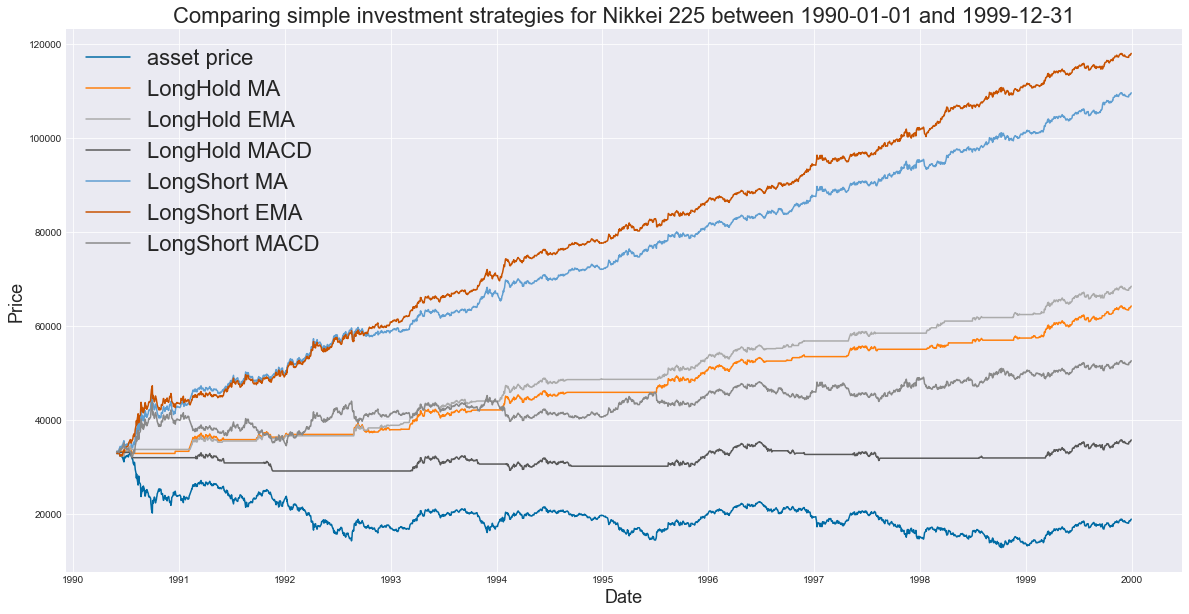

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,-0.110484,0.239664,0.259944,6.423402,0.023001,0.034261,-0.569172,-0.760523
LongHold MA,0.069773,0.055984,1.196102,14.413954,0.003420,0.007853,0.689819,-0.052506
LongHold EMA,0.077342,0.052983,1.432712,16.137890,0.002815,0.007186,0.867615,-0.037543
LongHold MACD,0.003794,0.066525,0.098290,9.842731,0.006171,0.010969,-0.382501,-0.130965
LongShort MA,0.128387,0.081282,-0.611840,19.153596,0.007113,0.011382,1.175329,-0.117975
LongShort EMA,0.137691,0.078967,-0.540467,18.764648,0.006811,0.011066,1.324188,-0.113524
LongShort MACD,0.037945,0.109828,-0.429270,9.151323,0.011167,0.016092,0.070238,-0.233258


In [16]:
# The lost decade. Nikkei 225 in the 90's
start = datetime.date(1990, 1, 1)
end = datetime.date(1999, 12, 31)
ticker = "^N225"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(ticker="Nikkei 225", start=str(start), end=str(end), df=df_price_of_strategy)
table

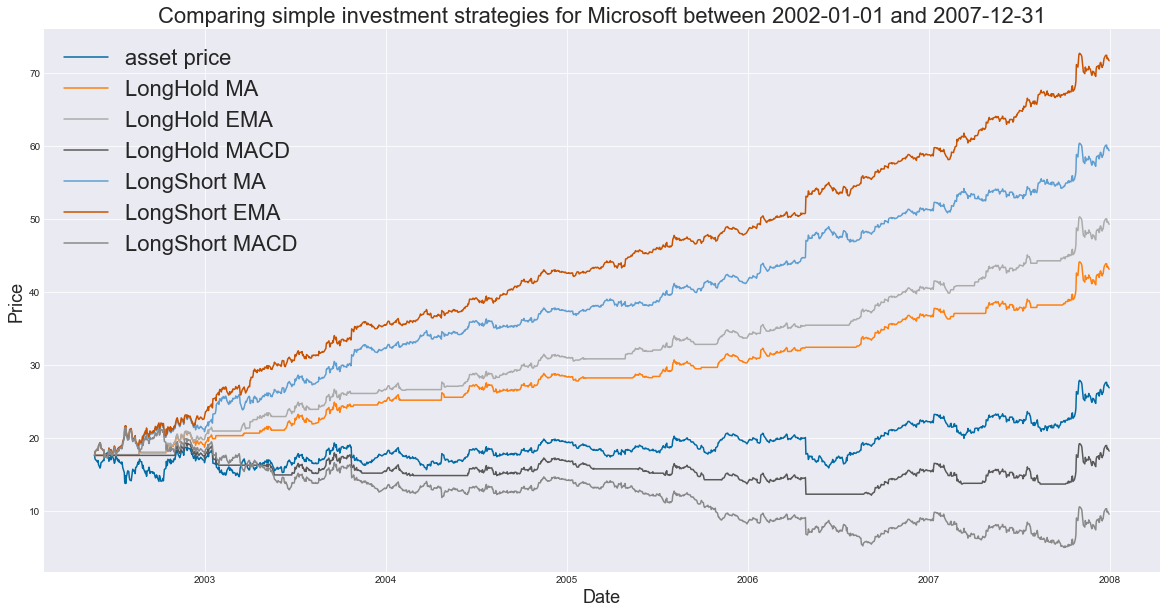

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,0.012659,0.250351,-0.421888,10.513894,0.025204,0.036487,-0.067271,-0.329520
LongHold MA,0.157600,0.115177,0.998946,12.629191,0.007718,0.016539,1.075716,-0.105686
LongHold EMA,0.186809,0.110196,1.065211,13.865710,0.006940,0.015292,1.381716,-0.074438
LongHold MACD,-0.040377,0.216763,-1.400137,36.411272,0.018247,0.033569,-0.315263,-0.457711
LongShort MA,0.212095,0.155803,0.214145,11.114968,0.013114,0.022895,1.134837,-0.149188
LongShort EMA,0.256789,0.147168,0.176695,12.370142,0.012070,0.021549,1.496324,-0.147688
LongShort MACD,-0.259785,0.435550,-0.984217,25.576315,0.040598,0.067597,-0.646035,-0.896147


In [17]:
# Let's look at a stock that was very stable through for a given time period
# to see how the MA strategy might perform in periods of stagnation
# this kind of strategy works best when the markets have long up trends and long downtrends
start = datetime.date(2002, 1, 1)
end = datetime.date(2007, 12, 31)
ticker = "MSFT"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=True, EMA=True, MACD=True, LongHold=True, LongShort=True)

plot_strategy(ticker="Microsoft", start=str(start), end=str(end), df=df_price_of_strategy)
table

Based on the observations this far, it seems that the Long/short strategy performs better than Long/hold, and that the Exponential moving average performs better than the simple moving average when using a 100 day lookback period.

In general the longhold strategy has lower max drawdown than the longshort strategy, but doesn't come close to the return of the long/short strategy. We still a higher sharpe for the longshort strategy over the assets tested, but some asset managers might still want to use the longhold strategy depending on their investing requirements. Funds are often limited to long only positions. A pension fund will have to pay out to retirees and can't suffer too high drawdowns and can benefit for a longhold approach. If we in addition hold a bond instead of holding cash we will see a higher performance while maintaining a low volatility.

### MACD

Moving average convergence divergence compares a short term moving average with a longer term. When the shorter crosses over the longer one, the

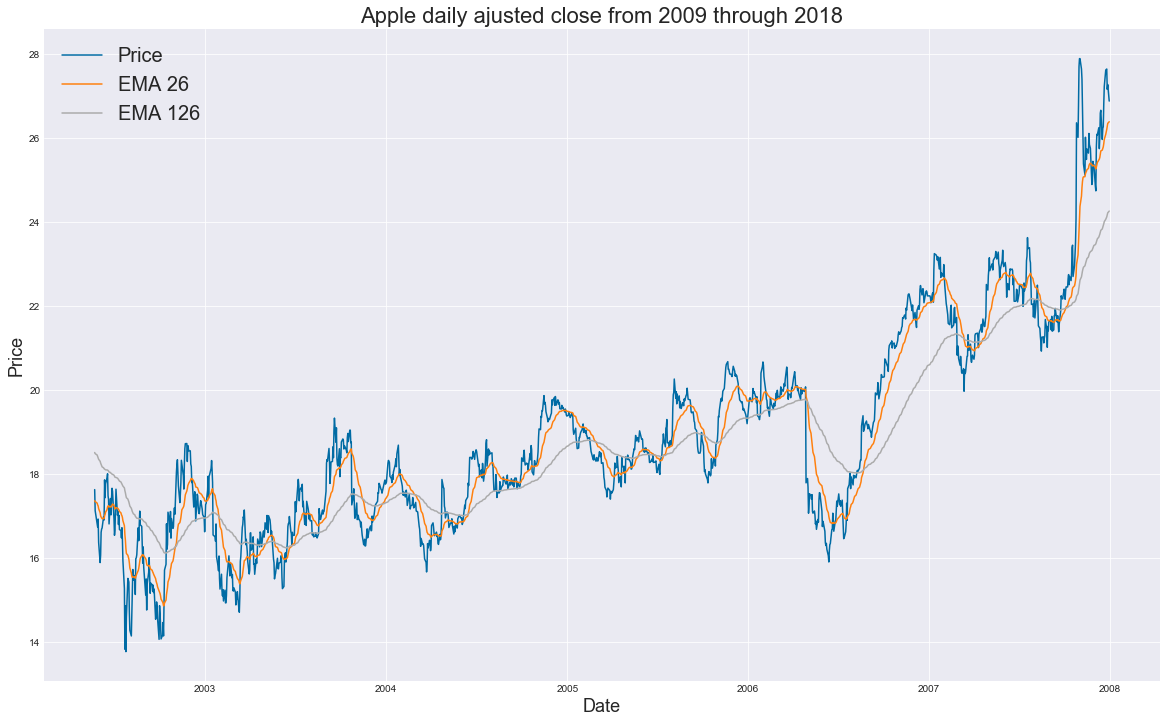

In [18]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(df["Adj Close"])
ax1 = plt.plot(df["EMA_26"])
ax1 = plt.plot(df["EMA_126"])
ax1 = plt.title("Apple daily ajusted close from 2009 through 2018", fontsize=22)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Price", fontsize=18)
ax1 = plt.legend(["Price", "EMA 26", "EMA 126"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

### Compare the Longhold and the LongShort EMA strategies through each decade from the 80's on the S&P 500

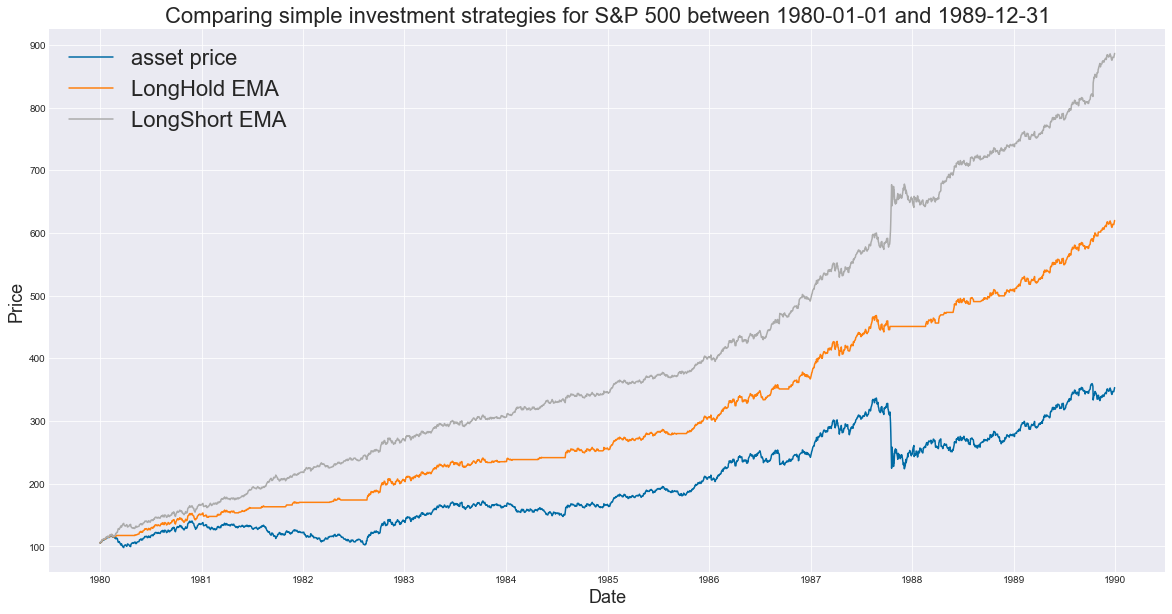

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,0.092226,0.178375,-5.039509,116.518275,0.003061,0.024272,0.338716,-0.403716
LongHold EMA,0.184550,0.082912,0.112061,6.085103,0.007411,0.011665,1.809961,-0.067019
LongShort EMA,0.226403,0.088091,1.438176,26.712307,0.003162,0.011188,2.164869,-0.061983


In [19]:
start = datetime.date(1980, 1, 1)
end = datetime.date(1989, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=False, EMA=True, MACD=False, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table

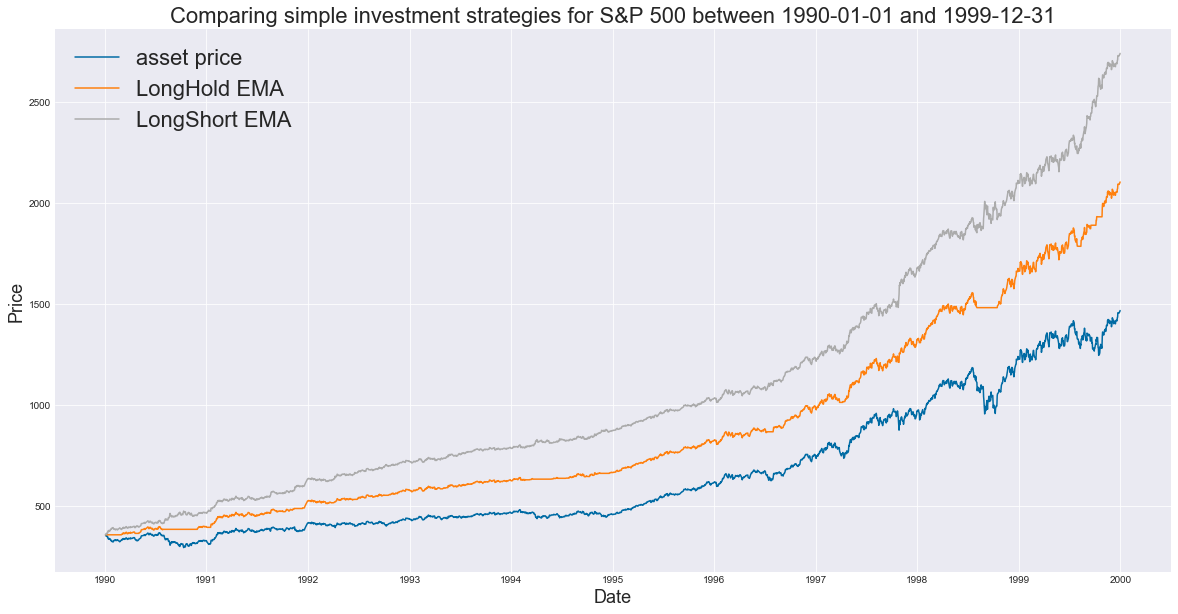

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,0.128222,0.141211,-0.440011,8.647106,0.014177,0.020548,0.675385,-0.210178
LongHold EMA,0.184285,0.085457,0.275337,5.927089,0.007420,0.011764,1.753038,-0.050744
LongShort EMA,0.215725,0.086088,0.413711,6.693222,0.007069,0.011157,2.094806,-0.056243


In [20]:
start = datetime.date(1990, 1, 1)
end = datetime.date(1999, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=False, EMA=True, MACD=False, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table

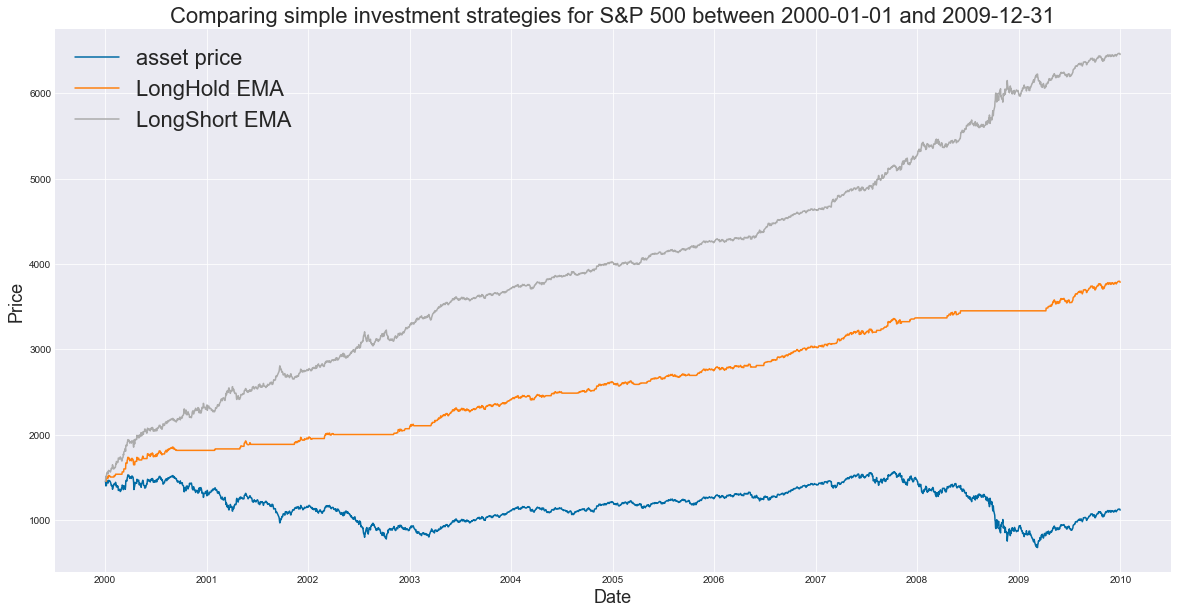

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,-0.073473,0.222676,-0.305177,10.659249,0.022297,0.034348,-0.451209,-0.713092
LongHold EMA,0.097594,0.051648,1.734748,21.363982,0.001982,0.006940,1.270768,-0.051301
LongShort EMA,0.154579,0.074234,0.730954,12.800304,0.005166,0.009998,1.629517,-0.059739


In [21]:
start = datetime.date(2000, 1, 1)
end = datetime.date(2009, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=False, EMA=True, MACD=False, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table

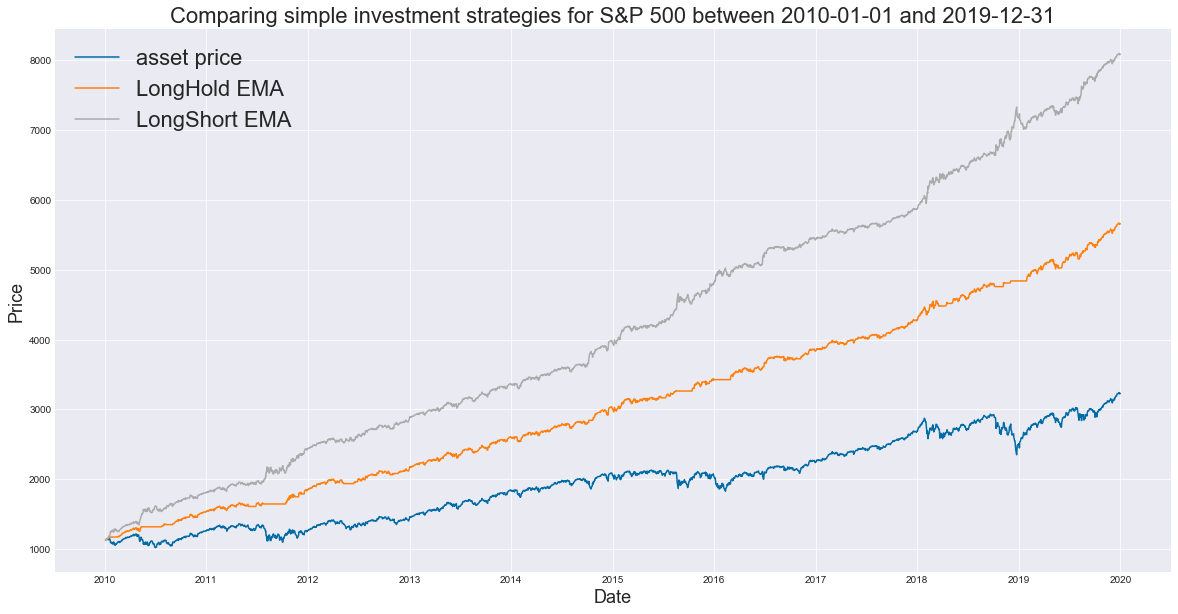

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
asset price,0.086534,0.148216,-0.586266,7.784463,0.015575,0.023744,0.370356,-0.220110
LongHold EMA,0.169158,0.068949,0.167027,9.336299,0.005749,0.009820,1.959728,-0.040906
LongShort EMA,0.209964,0.078515,0.397380,9.266452,0.006166,0.010785,2.225610,-0.050869


In [22]:
start = datetime.date(2010, 1, 1)
end = datetime.date(2019, 12, 31)
ticker = "^GSPC"
days = 100

df, table, df_return_of_strategy, df_positions, df_price_of_strategy = strategy(
            ticker, start, end, days=days, MA=False, EMA=True, MACD=False, LongHold=True, LongShort=True)

plot_strategy(ticker="S&P 500", start=str(start), end=str(end), df=df_price_of_strategy)
table